# 2 ライブラリとミニバッチ学習

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

In [2]:
data = np.arange(100)
data

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [3]:
batch_size = 20
batch_n = len(data) // batch_size
batch_index = np.arange(len(data))

for epoch in range(3):
    np.random.shuffle(batch_index)
    print(f"Epoch {epoch}") 
    
    for n in range(batch_n):        
        mb_index = batch_index[n*batch_size:(n+1)*batch_size]
        print(data[mb_index])

Epoch 0
[80 84 33 81 93 17 36 82 69 65 92 39 56 52 51 32 31 44 78 10]
[ 2 73 97 62 19 35 94 27 46 38 67 99 54 95 88 40 48 59 23 34]
[86 53 77 15 83 41 45 91 26 98 43 55 24  4 58 49 21 87  3 74]
[30 66 70 42 47 89  8 60  0 90 57 22 61 63  7 96 13 68 85 14]
[29 28 11 18 20 50 25  6 71 76  1 16 64 79  5 75  9 72 12 37]
Epoch 1
[83  9 84 40 94 39 23 11  6 81 43 80 38 31 45 66 46 55 99 69]
[91 93 12 21 85  3 65 18  4 27 60 88 74 72 29 51 86 10 70 64]
[35 42 90 98 95 76 59 14 49 71 77 44 17 32 47 26 34  7  8 37]
[97 78 53 22 58 25 75 63 30 89 56 54 20 19 28 62 92 52 87  0]
[41  1 48 67  2 15  5 79 61 68 82 96 73 16 13 33 57 50 24 36]
Epoch 2
[33 63 57 54  9 41 36 76 17 18 50 22 96 56 98 80 59 13 93 68]
[78 86  7 82  8 81 38 99 27 46 44  3 23 31 89 12 61 35 51 34]
[92 19 83 94 55 37 75 53 24 43 90 25 21 71 62 39 64 30 70 79]
[10  1 87 40 20 15 29 97 14 32 11 65 69 45 60 66 95 91 85 58]
[42  0 77 52  5 16  6 28 73 88 48 26  4 74 47 49 67  2 84 72]


# 3 データの作成

In [4]:
x_train = np.random.normal(5, 1, 100)
t_train = 2 + 3*x_train + np.random.randn(100)
# x_train = (x_train - x_train.mean())/x_train.std()
# t_train = (t_train - t_train.mean())/t_train.std()

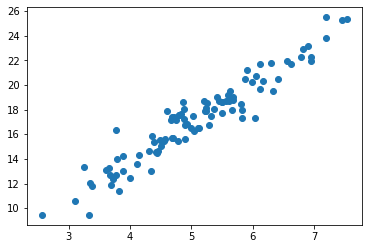

In [5]:
plt.scatter(x_train,t_train)

# 4 モデル

In [6]:
def model(x ,w, b):
    y = w*x + b
    return y

In [7]:
def loss(y, t):
    L = sum((y-t)**2) / len(t)
    return L

In [8]:
def optimizer(x, y, t, w, b, lr):
    dL = 2*(y-t) / len(t)
    dw = np.dot(dL, x)
    db = dL.sum()
    w = w - lr*dw
    b = b - lr*db
    return (w,b)

# 5 モデルの学習(ミニバッチ学習・SGD)

In [9]:
w,b = 0.5, 0.5

batch_size = 20
batch_n = len(x_train) // batch_size
batch_index = np.arange(len(x_train))

loss_all = []

for epoch in range(1, 100 + 1):
    
    np.random.shuffle(batch_index)
    
    for n in range(batch_n):
        mb_index = batch_index[n*batch_size:(n+1)*batch_size]
        y = model(x_train[mb_index], w, b)
        loss_train = loss(y, t_train[mb_index])
        
        w,b =optimizer(x_train[mb_index], y, t_train[mb_index], w, b, lr=1e-3)
    
    loss_all.append(loss_train)

    if epoch == 1 or epoch % 20 == 0:
        print(f"Epoch {epoch}, Loss {loss_train:.4f}")

Epoch 1, Loss 138.7087
Epoch 20, Loss 0.9417
Epoch 40, Loss 1.0191
Epoch 60, Loss 0.6701
Epoch 80, Loss 0.9781
Epoch 100, Loss 1.7295


# 6 結果の可視化

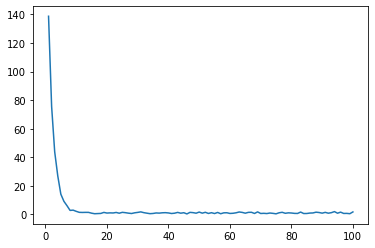

In [10]:
plt.plot(range(1,len(loss_all)+1), loss_all)

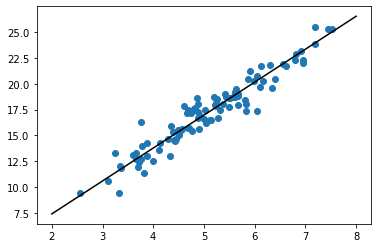

In [11]:
x = np.arange(2,9)
y = model(x,w,b)
plt.plot(x, y, color="black")
plt.scatter(x_train, t_train)